In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras import datasets

In [6]:
(X_train,Y_train),(X_test,Y_test)= datasets.cifar10.load_data()

170498071/170498071 [==============================] - 22s 0us/step


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [9]:
np.shape(X_train)

(50000, 32, 32, 3)

In [10]:
np.shape(X_test)

(10000, 32, 32, 3)

In [11]:
np.shape(Y_train)

(50000, 1)

In [22]:
#reshape from 2d to 1d
Y_train = Y_train.reshape(-1,)
np.shape(Y_train)

Y_test = Y_test.reshape(-1,)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [23]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


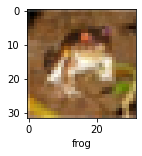

In [24]:
plot_sample(X_train,Y_train,0)

In [26]:
X_train = X_train/255
X_test = X_test/255

In [30]:
#try a NN

ann = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

ann.fit(X_train,Y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 6s 2ms/step - loss: 1.8556 - accuracy: 0.3291
Epoch 2/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6981 - accuracy: 0.3921
Epoch 3/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6303 - accuracy: 0.4154
Epoch 4/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5785 - accuracy: 0.4336
Epoch 5/5
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5461 - accuracy: 0.4445


In [34]:
predict = ann.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [37]:
classes[np.argmax(predict[0])]

'dog'

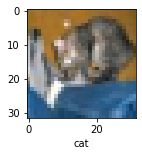

In [38]:
plot_sample(X_test,Y_test,0)

In [39]:
#try cnn
cnn = Sequential([
    Conv2D(filters=64, kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(filters=64, kernel_size = (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(10,activation='softmax')
])

In [40]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [41]:
cnn.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 2ms/step - loss: 1.4535 - accuracy: 0.4797
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0859 - accuracy: 0.6209
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.9652 - accuracy: 0.6636
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8809 - accuracy: 0.6915
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8189 - accuracy: 0.7146
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.7663 - accuracy: 0.7342
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.7182 - accuracy: 0.7494
Epoch 8/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6775 - accuracy: 0.7626
Epoch 9/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6399 - accuracy: 0.7765
Epoch 10/10
1563/1563 [==============================] - 3s 2ms/step - loss: 0.607

In [42]:
predict = cnn.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [43]:
classes[np.argmax(predict[0])]

'cat'

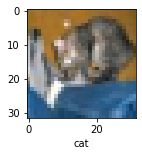

In [44]:
plot_sample(X_test,Y_test,0)